# <font color='EC2C04'>  THE FASHION-MNIST PENALISED CHALLENGE:  </font>
<font color='EC2C04'> Does Size Matter? Build Deep Learning Neural Networks with less than 1k observations </font>
---



![alt text](mnist.png)

# INTRODUCTION 

- **The Project**: The project presented intends to lead an analysis of the different structures of deep learning neural network, with the attempt to define the best model to predict the outcome of classification task of interest. In particular, the goal is the one to teach the machine to recognise images between 10 different categories of clothes. For the purpose of the project only a subset of the images available will be used. The reason for this is choice is at first to increase the difficulty of the goal in order to have a better understanding of the model which suit best for the purposes, as well as working on my technical growth by facing a complicate situation. Secondly, the reason is due to the excessive slowness of the model when trained on a set of data too high. Finally, an attempt to work in this direction can help to verify if the amount of data in a deep learning neural network can be considered a key element for the building of robust models.


- **The Data**:  Fashion-MNIST is a dataset of Zalando's article images- constisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example represents a 28x28 getscale image, associated with a label from 10 classes. As mentioned above, for the occasion, the dataset has been subset into one with only 800 observations, organised in this way: 


       *   Train data: 300 observations
       *   Validation data: 200 observations
       *   Test data: 300 observations
       
---
   
**Personal Note**: Deep learning networks tend to be generally considered not enough suitable when the number of training data is low. Although I am conscious about this element, I conceived this project as a way to have the possibility to explore the different models, more than to find the best accuracy for this classification problem. In fact, this dataset is widely used by the AI community when it comes to learning the different methods, and I considered the idea of 'penalise' my starting point more involving than simply run models with over 90% of accuracy as starting point.

---








| LABEL | INDEX|
  --- | ---
 | T-shirt/top |  0
 |Trouser| 1
 |Pullover|2
 |Dress|3
 |Coat | 4
 | Sandal| 5
 | Shirt|6
 | Sneaker | 7
 | Bag|8
 | Ankle boot|9
 
 ---

# PREPARATION 

## Import Libraries and Dataset

In [0]:
# IMPORT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator 
from keras import regularizers
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Input
from keras.layers.normalization import BatchNormalization


In [0]:
# IMPORT DATASET.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Data Preprocessing
-  Split X and Y (label)
- Subset data ( as previously explained )
- Obtain Train and Validation data
- Normalise data: Include values from 0 to 1 ( instead of 0 to 255 )
- ~~Reshape data: combine each image into 3D tensor~~*
- One-hot encode the labels: returning a matrix of shape = (n_obs, 10)





\*  Operation performed in the next section ( Convolutional Neural Network model)

In [0]:
# Convert dataframe into Numpy arrat
train = np.array(train_df, dtype = 'float32') # Float32 best solution for tensorflow
test = np.array(test_df, dtype = 'float32')

# split x and y
x_train = train[:,1:]/255 # all rows and from second column to on
y_train = train[:,0]
x_test = test[:,1:]/255 
y_test = test[:,0]

In [0]:
# Subset data + Create train/validation
(x_train, x_valid) = x_train[200:500], x_train[:200] 
(y_train, y_valid) = y_train[200:500], y_train[:200]
x_test = x_test[:300]
y_test = y_test[:300]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [308]:
# Print the number of training, validation, and test datasets
print('VERIFY THE NUMBER OF OBSERVATIONS: \n')
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

VERIFY THE NUMBER OF OBSERVATIONS: 

300 train set
200 validation set
300 test set


---

# Part I: FULLY-CONNECTED NEURAL NETWORK
​
The first part of the analysis aims to build a Fully-connected Neural Network, which can be considered for some extent, the easier type of network. For this reason, the hyperparameters are limited in comparison to other types of model.
Moreover, it is important to take into consideration that due to the low amount of training data, one of the biggest concern of the analysis is supposed to be the risk of overfitting.
Specifically, the analysis will be developed into two direction:
- Build a robust deep learning fully connected network ( a 'deeper network' than the next one )
- Build a smaller fully connected network in terms of hidden layers.
​
----
**These model will be then compared in order to verify the different performance in terms of accuracy and loss**.

---

## Deeper Network vs Lower Network

The first models to be developed owns the characteristics described in the summary below.
The network will be surely lead to overfitting, but by writing two models with opposite caracteristics (Deeper vs. Lower) can give an opportune idea of the range capacity of the model.

* Deeper Network: 3 hidden layers ( 256, 128, 64 units per layer )
* Lower Network:  2 hidden layers ( 64, 32 units per layer )

For both the models, I use:
      * Activation function 'ReLu'
      * Last layer activation 'softmax' which has 'categorical crossentropy Loss function '
      * Optimizer = 'Adam'. This parameter will be kept constant during all the analysis.
      * Epochs = 80, in order to have an initial taste of the trend for both the models
      * Batch size = 50, which can seem low, but is important to consider that it represents 1/6 of the training data
      

In [0]:
# DEEPER MODEL: CREATE
model = Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))
# COMPILE
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = [metrics.categorical_accuracy])
# FIT
history_deep = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),  epochs = 80,  batch_size = 50)

In [0]:
# LOWER MODEL: CREATE
model = Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# COMPILE
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = [metrics.categorical_accuracy])
# FIT
history_low = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),  epochs = 80,  batch_size = 50)

### Graphical comparison between the models

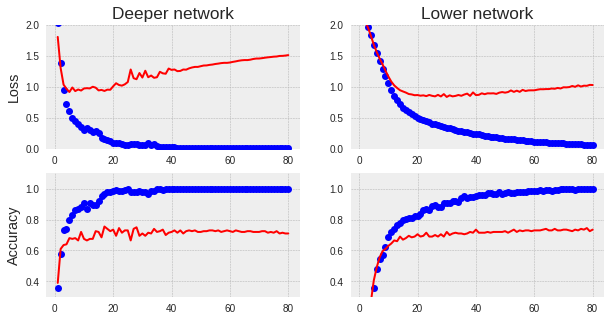

In [311]:
plt.style.use('bmh')
fig = plt.subplots(2, 2, figsize=(10,5))

# DEEPER PLOTS
plt.subplot(2,2,1)
history_dict = history_deep.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('Deeper network')
plt.ylim(0,2)
# plt.savefig('model1.0.png')
plt.subplot(2,2,3)
acc = history_deep.history['categorical_accuracy']
val_acc = history_deep.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('Deeper network')
plt.title('')
#############

# LOWER PLOTS
plt.subplot(2,2,2)

history_dict = history_low.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')

plt.title('Lower network')
plt.ylim(0,2)
# plt.savefig('model1.0.png')
plt.subplot(2,2,4)
acc = history_low.history['categorical_accuracy']
val_acc = history_low.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)



plt.show()

**COMMENT:**By comparing the plots of the Loss and Accuracy parameters of the Deeper model and the Lower model it is possible to notice a very similar trend.
In fact, despite the Deeper network seems to reach its best value of accuracy and loss quicker than the Lower, they both tend to become stable around an accuracy of 0.7 ( with a slighly higher value of accuracy for the Deeper network).
In both cases, it is evident that the overfitting represents the main issue of the model. After 20 epochs the model stops being productive and the two curves ( training data and validation data) start to change direction, proving that the overfitting is increasing.

---

At this point, the **strategy** is the following:

1) **Select one of the two model to work on**: the next models will be built on the basis of the lower network. Although the Deeper network seemed to provide better results, the main objective at the moment is working on the overfitting issues (strategies to contrast it suggest to lower the network). Also, the difference of performance is not too high, suggesting me to go in the direction of a easier network.

2) **Attempt to contrast the overfitting** by introducing different strategies ( Reduce Network size such as hidden layer, units per layer, Dropout, weight regularization)

3) As soon as the overfitting has been reduced, move into the direction of **increasing the performance**.

## Regularization Process: Reduce Overfitting
- **Lower the Network**
- **Dropout**
- **Weight Regularization**


Different attempts around the above mentioned possibilities have been made. At the end, the following strategy has been chosen:

    * No Reduction of the network: Since the lower network has already been chosen, I considered to skip this phase,   maintaining the structure of two hidden layer. On the other side, the number of units has been increased from 32 to 64, in order to collect more information which will later be processed/partially excluded by the 0.4 dropout put between the two layers.
    
    * Dropout: Different attempts have been made both to put dropout in different position of the neural network, and to define the amount of data to be dropped in each of these. In the end, it has been chose to drop respectively 40% of connections between the two hidden layers, and 30% before the last layer.
    
    
    * Weight Regularization: The attempt to add to the loss function associated with having large weights has been done by using both the L1 norm (absolute value of the weight coefficients) and the L2 norm(square of the value of the weight coefficients). I chose to apply an 'heavy' parameter to simplify the model / force the weight to take only small values.
    

    
   

In [0]:
# CREATE
model = Sequential()
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer= regularizers.l2(0.01), input_shape = (28*28,)))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=  regularizers.l1_l2(l1 = 0.001, l2 = 0.01)))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# COMPILE
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = [metrics.categorical_accuracy])
# FIT
history_overfitting = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),  epochs = 200,  batch_size = 50)

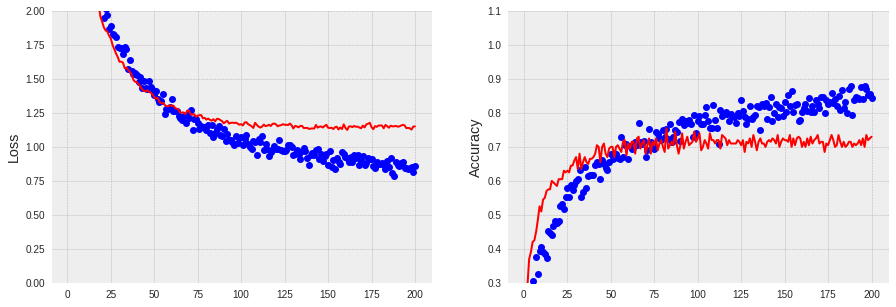

In [313]:
# PLOTS NETWORK vs overfitting 
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history_overfitting.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history_overfitting.history['categorical_accuracy']
val_acc = history_overfitting.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENT:** Despite the overfitting seems to be reduced by the choices afore mentioned, it seems like the accuracy of the model is on the validation data is stabilized to the same value. In this context, few attempt will be made in order to try to optimize the Fully-connected models. However, this situation of staticity seems to suggest the necessity of moving towards more useful models, and networks which can be more indicated for image processing tasks, such as Convolutional networks. (see following)

## Increase Performance

The last attempt to modify and define the Fully-connected network is to try to optimize its performance. In this sense, the goal is the one to work on a series of options which could help achieving this result:

- EPOCHS, BATCHES
- LEARNING RATE

After a series of attempt, the model has been set with the following parameters:

      * Epochs, Batches: the work on these parameters did not show any improvement. Lowering the numner of Batches to 25 seemed to have reduced even more the overfitting, but due to the fact that the performance of the model is stable to 70% accuracy, this does not represent a great achievement.
      
      * Learning Rate: different attempts to work on the learning rate have been made. In particular, I firstly chose two very different values in order to define a range of action. The two extremes of the range considered for the analysis, which is 0.001 to 0.01, have shown very different attitudes, as expected. The first provided slow improve, while the second leaded to a very noisy curve due to the impossibility to define a optimal strategy of learning. The value in between, 0.05, did not lead the model to any improvement. A second attempt regarded the use of the ReduceLROnPlateau Callback, which helped to monitor the learning rate when the validation stopped improving.
      
  
      
      
      
      
Moreover, the **ModelCheckpoint** and **EarlyStopping** callbacks will come to help in order to avoid the model to be trained unusefully. The Early stopping will terminate the training when the model will have nothing more to offer in terms of improvement, and the Model Checkpoint will save the best model.


In [0]:
# CREATE
model = Sequential()
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer= regularizers.l2(0.01), input_shape = (28*28,)))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=  regularizers.l1_l2(l1 = 0.001, l2 = 0.01)))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

# COMPILE
callbacks_list = [
    #keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy', patience = 10),
    keras.callbacks.ModelCheckpoint(filepath = 'Fconnected_model.h5', monitor = 'val_categorical_accuracy', save_best_only = True),
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)]


#my_optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = [metrics.categorical_accuracy])
# FIT
history_optimisation = model.fit(x_train, y_train, 
                                 validation_data=(x_valid, y_valid),
                                 epochs = 200, 
                                 callbacks = callbacks_list,
                                 batch_size = 25)

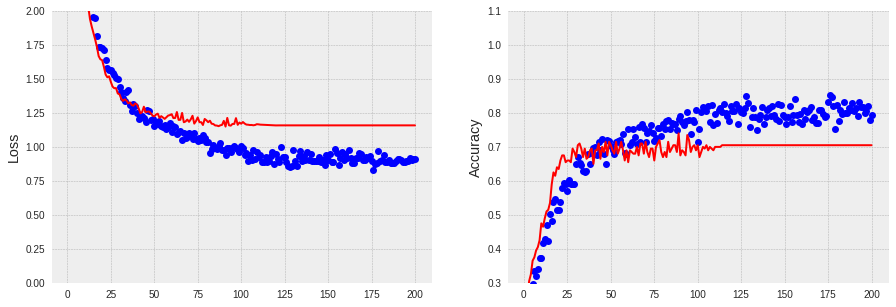

In [315]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history_optimisation.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history_optimisation.history['categorical_accuracy']
val_acc = history_optimisation.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENTARY:  None of the attempts has leaded to any improvement to the model** , which is steadily set to an accuracy of 0.7. The conclusion is that it will be probabily necessary to move into techniques and network which better suit the scope of the project, which is the process of image recognition.

## Test the final model

In [319]:
score = model.evaluate(x_test, y_test, verbose = 0),
fully_connected = round(score[0][1]*100,2)

print('Accuracy of the Fully-Connected Neural Network = ', round(score[0][1]*100,2),'%')

Accuracy of the Fully-Connected Neural Network =  72.0 %


---

# Part II: CONVOLUTIONAL NEURAL NETWORK

This section has the goal of working on a different type of network, which is the Convolution Neural Network. The first phase regards the necessity to reshape the training data in order to obtain a 3D tensor of shape (28, 28, 1) for each of the observation belonging to the data.

In [320]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Verify the shape
print('x_train shape: {}'.format(x_train.shape))
print('x_validate shape: {}'.format(x_valid.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (300, 28, 28, 1)
x_validate shape: (200, 28, 28, 1)
x_test shape: (300, 28, 28, 1)


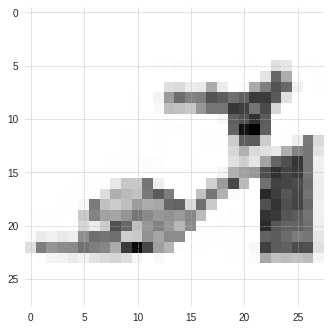

In [390]:
# Observe one of the pictures
image = x_train[40,:].reshape((28,28))
plt.imshow(image)
plt.show()

## Build the First, simple, CNN model

The first step of the creation of the CNN aims to build a simple model which could be able to address the future actions.
In this context, the first network is organised as following:

-  Convolutional hidden layer : 

  *  64 filters ( which can potentially identify 64 features of the image analysed)
  * Kernel size 3x3 
  * No padding applied 
  * Activation = Relu
  
- Max-Pooling layer applied, in order to downsample the feature maps:
  
    * Poolsize 2x2 
    
 
- Flatten layer, in order to reshape the tensor to before to input the values into a fully-connected layer. 
 
 
 
 
 - Fully-connected layer, containing 256 units.

In [0]:
# CREATE THE MODEL
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam',   # optimizer = Adam(lr = 0.001)
             metrics=[metrics.categorical_accuracy])

# FIT
history = model.fit(x_train,
         y_train,
         batch_size=50,
         epochs=100,
         validation_data=(x_valid, y_valid))

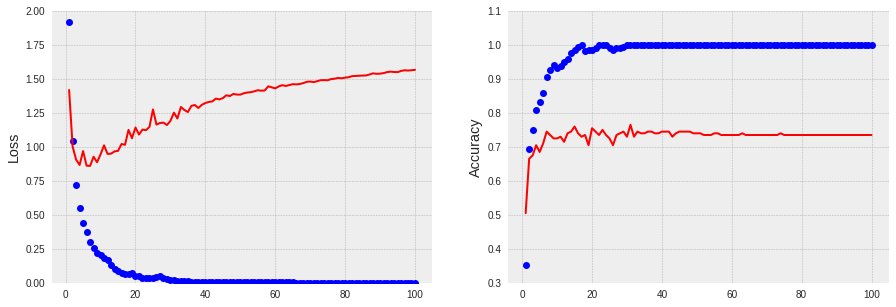

In [323]:
# PLOTS NETWORK 
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

** COMMENT:** Despite the tiny improvement from the previous Neural Network model and the enourmous overfitting visible in the plots could lead me and whoever in my place to give up and jump out of the window, it is important to see the good news: The good news is that the randomly set CNN has given in its first attempt higher results than the Fully-connected NN at the end of its build.
This can only represent the starting point for a better result.

## Regularization Process

Just like it was for the first Part, this section aims to contrast the significative overfitting which is affecting the model. From this point of view, the first techniques considered are the same considered before:
- Modify the network size
- Dropout
- Weight Regularization


However, in this case I will try to increase the size of the network before to apply any modification. In this way, I am faitful to be able to work better in the future process of optimisation of the model. Moreover, the overfitting issue bothers me less than before, since the goal using this neural network is to be able to widely improve my accuracy than the previous section. Otherwise, I would not be satisfied about the results.

In [0]:
# CREATE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',
                                 kernel_regularizer= regularizers.l2(0.01),input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',
                                kernel_regularizer= regularizers.l2(0.01)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam',   # optimizer = Adam(lr = 0.001)
             metrics=[metrics.categorical_accuracy])

# FIT
history = model.fit(x_train,
         y_train,
         batch_size=50,
         epochs=100,
         validation_data=(x_valid, y_valid))

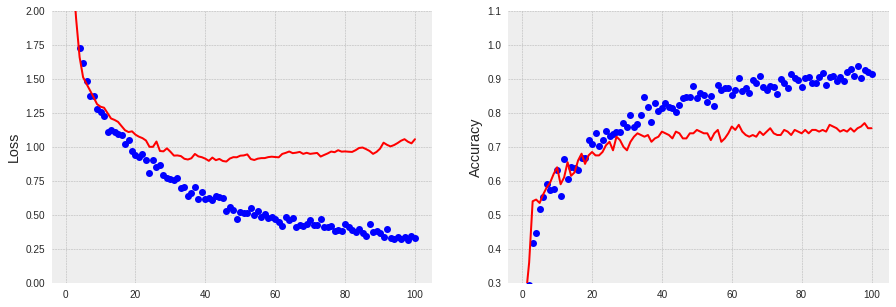

In [325]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

** COMMENT:** So far, I cannot consider myself entirely satisfed about the results. In fact, the accuracy seems to be increase of slightly more than 2/3 % of average, and the Loss function seems to promise its best value around 0.95 against the average of 1.25 in the Fully connected NN. 
The next section introduces one powerful solution, which can be very useful in cases like this where the lack of training data seems to be limiting the analysis.

---

## Data Augmentation 

This technique represents a powerful tool when it comes to increase the amount of training data with computer vision models. The possibility of manipulate the different images by performing operations such as rotation, zoom, shift etc, can help to obtain more images for the training data, increasing the possibility of the network to increase its power.

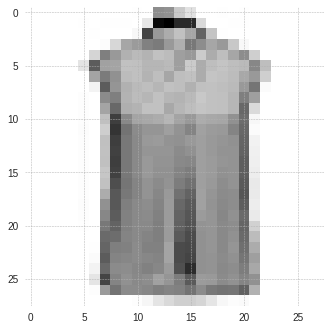

In [372]:
image = x_train[120,:].reshape((28,28))
image = plt.imshow(image)
plt.savefig('image1.0.png')


### NOTE: 
Unfortunately the `ImageDataGenerator `function has given me a series of problems, which lead me to the inability of proceeding with this section.
In fact, in order to move toward this goal the function `flow_from_directory` needs to be used. However, having my data/images directly set up as a csv, first, and a DataFrame after implied that I had to use the function `flow_from_dataframe`which has given me problems in terms of evaluation.
The time to sort the problem has not be sufficient.
Despite this section will have to be skip, it is very important to mention the opportunity offered by the Data Augmentation operations, which honestly represented one of the reason why I decided to involve myself in a challenging project with such a small amount of data. On the other side, I was highly faithful that this solution could help me to obtain great results.

In [0]:
# gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

---

## Improve the performance of the Model

In this section different attempts to improve the performance of the model are introduced. From this point of view, the first part regards the attempt to modify parameters of the convolutional layers, while in the second part the goal is the one of introducing more advanced techniques



### 1. Modify Convolutional parameters

The different possibilities granted by the CNN are the following:

        * SIZE OF PATCHES
        * PADDING: Useless in this case, since the images do not have big definitions in their frame side.
        * STRIDE: Possibility to set it to 2 instead of the default 1
        * SIZE OF THE POOLING: Possibility to set it 2x2 size
        
        
        
        
After a series of attempts, the result did not show any improvement. In this context, the result of these modification will not show.

### 2. Advanced Techniques:


#### A. Batch Normalization

The following technique can be useful to normalize data even within the process of definition of the model. In fact, without it, it is not possible to ensure that the data which are normalized before to be put as input for the model, will remain so during as output. The batch normalization techniques allows this to happen.

This layer will be experiments in different position of the neural network, in order to verify which solution can be useful to increase the performance of it.

In [0]:
# CREATE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))#,kernel_regularizer= regularizers.l2(0.01))) 
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))#, kernel_regularizer= regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam',   # optimizer = Adam(lr = 0.001)
             metrics=[metrics.categorical_accuracy])

# FIT
history = model.fit(x_train,
         y_train,
         batch_size=20,
         epochs=60,
         validation_data=(x_valid, y_valid))

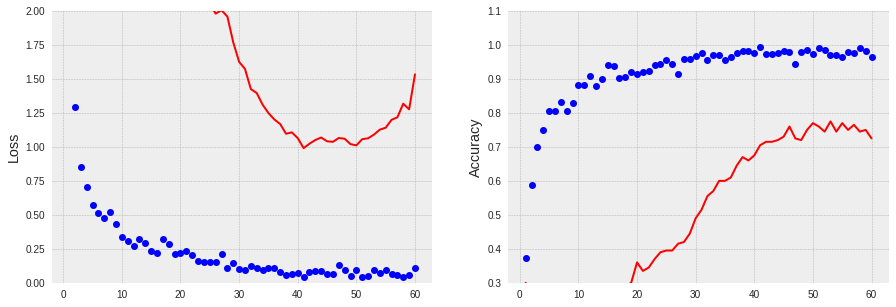

In [328]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENT:** Despite the attempts, BatchNormalization did not show great improvements. At the same time, for the first time the validation accuracy has reached the value of 0.8. 

#### B. Depthwise Separable Convolution


The following model should be ideal in cases like the one of this project, which is when the models to be trained are small. The hope is that the possibility to have a spatial convolution on each channel performed independently will make the model lighter.

In [0]:
model = Sequential()
model.add(layers.SeparableConv2D(32, 2, activation='relu', input_shape=(28,28,1)))
model.add(layers.SeparableConv2D(64, 2, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 2, activation='relu'))
model.add(layers.SeparableConv2D(128, 2, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 2, activation='relu'))
model.add(layers.SeparableConv2D(128, 2, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=[metrics.categorical_accuracy])
# FIT
history = model.fit(x_train,
         y_train,
         batch_size=50,
         epochs=200,
         validation_data=(x_valid, y_valid))

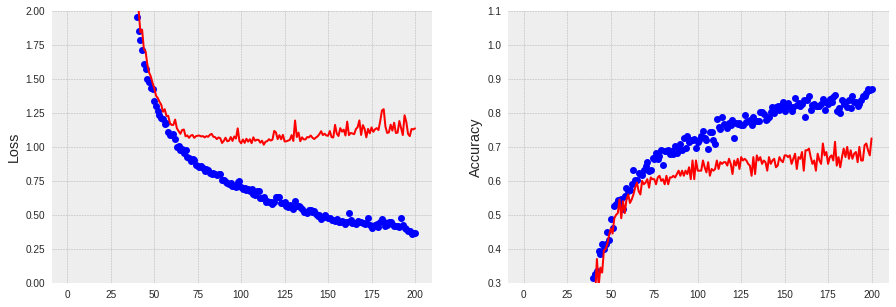

In [330]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENT:** No attempt has been able to lead to a high increase in the accuracy of the model. In this sense, the potentiality of the dataset seems to saturate around 75% of accuracy, leading me to conclude that the challenge I set, which was the attempt to build a model with nothing but 800 pictures, can offer nothing more than this level of accuracy.


**At the end of this section**, I decided to maintain the model defined in the Batch Normalization section, which seemed to give slightly higher results in terms of accuracy.
So, the last model to be trained has the following structure, using the Callbacks tools to optimize the process:



In [0]:
# CREATE
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))#,kernel_regularizer= regularizers.l2(0.01))) 
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))#, kernel_regularizer= regularizers.l2(0.01)))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [366]:
# COMPILE
callbacks_list = [
    #keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy', patience = 10),
    keras.callbacks.ModelCheckpoint(filepath = 'cnn_model.h5', monitor = 'val_categorical_accuracy', save_best_only = True)]


# NB !  keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10 makes the server crash, so
# I REMOVED IT FROM THE FUNCTION

#my_optimizer = keras.optimizers.Adam(lr=0.001)
cnn_model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = [metrics.categorical_accuracy])
# FIT
history_optimisation = cnn_model.fit(x_train, y_train, 
                                 validation_data=(x_valid, y_valid),
                                 epochs = 60, 
                                 callbacks = callbacks_list,
                                 batch_size = 20)

Train on 300 samples, validate on 200 samples
Epoch 1/60
300/300 [==============================] - 52s 175ms/step - loss: 2.4055 - categorical_accuracy: 0.3400 - val_loss: 2.1560 - val_categorical_accuracy: 0.3500
Epoch 2/60
300/300 [==============================] - 2s 6ms/step - loss: 1.3215 - categorical_accuracy: 0.5567 - val_loss: 2.2050 - val_categorical_accuracy: 0.2150
Epoch 3/60
300/300 [==============================] - 2s 6ms/step - loss: 0.8637 - categorical_accuracy: 0.7300 - val_loss: 2.2806 - val_categorical_accuracy: 0.1400
Epoch 4/60
300/300 [==============================] - 2s 6ms/step - loss: 0.7014 - categorical_accuracy: 0.7400 - val_loss: 2.3149 - val_categorical_accuracy: 0.1800
Epoch 5/60
300/300 [==============================] - 2s 6ms/step - loss: 0.6502 - categorical_accuracy: 0.7733 - val_loss: 2.3695 - val_categorical_accuracy: 0.1850
Epoch 6/60
300/300 [==============================] - 2s 6ms/step - loss: 0.5291 - categorical_accuracy: 0.8100 - val_los

## Test the Final Model

In [367]:
score = cnn_model.evaluate(x_test, y_test, verbose = 0),
cnn = round(score[0][1]*100,2)

print('Accuracy of the Convolutional Neural Network = ', round(score[0][1]*100,2),'%')

cnn_model.save('cnn_2.h5') # Model manually saved, despite a copy should have been done by the Callback monitor

Accuracy of the Convolutional Neural Network =  75.33 %


---

# Part III: MULTI-GRAPH MODELS

The following section intends to explore the possibilities granted by models with  the so called directed acyclic graphs of layers, abandoning the Sequential network in order to move into the functional API.

**Note:** The ability and expertise to manage models which do not follow the Sequencial structure considered so far can only come with experience and the necessity/courage to **attempt**. This last element is the reason why I decided to take into consideration the following models, despite the risk of silly mistakes is higher in this section than in others. Those who do not attempt cannot learn.

## Inception Modules

The first attempt regards the inception, which is a type of network architecture for convolutional neural networks. 

In [339]:
x = Input(shape = (28,28,1))

# Create the different branches.

# branch_a
branch_a = layers.Conv2D(64, 1, activation = 'relu', strides = 2)(x)
branch_a = layers.Flatten()(branch_a)
# branch_b
branch_b = layers.Conv2D(64,1, activation = 'relu')(x)
branch_b = layers.Conv2D(64,3, activation = 'relu', strides = 2)(branch_b)
branch_b = layers.Flatten()(branch_b)
# branch_c
branch_c = layers.AveragePooling2D(3,strides = 2)(x)
branch_c = layers.Conv2D(64,3, activation = 'relu')(branch_c)
branch_c = layers.Flatten()(branch_c)
# branch_d
branch_d = layers.Conv2D(64,1, activation = 'relu')(x) 
branch_d = layers.Conv2D(64,3, activation = 'relu')(branch_d) 
branch_d = layers.Conv2D(64,3, activation = 'relu', strides = 2)(branch_d)
branch_d = layers.Flatten()(branch_d)
#concatenate the branches
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis = 1)

# Define the dense layers
output = layers.Dense(128, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

model = Model(x,output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_88 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_495 (Conv2D)             (None, 28, 28, 64)   128         input_88[0][0]                   
__________________________________________________________________________________________________
conv2d_492 (Conv2D)             (None, 28, 28, 64)   128         input_88[0][0]                   
__________________________________________________________________________________________________
average_pooling2d_42 (AveragePo (None, 13, 13, 1)    0           input_88[0][0]                   
__________________________________________________________________________________________________
conv2d_496

In [0]:
# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam',   # optimizer = Adam(lr = 0.001)
             metrics=[metrics.categorical_accuracy])
# FIT
history = model.fit(x_train,
         y_train,
         batch_size=50,
         epochs=60,
         validation_data=(x_valid, y_valid))

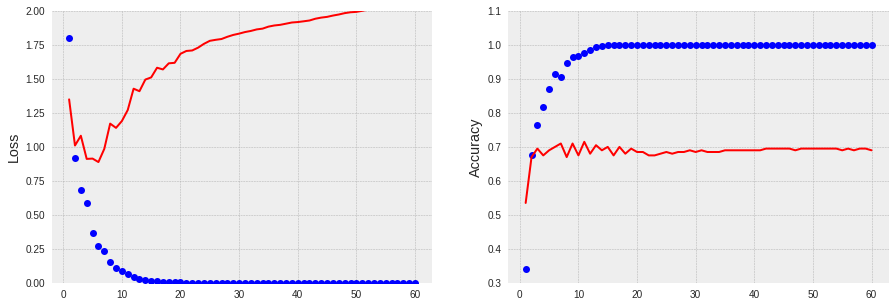

In [342]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENT:** The result is **not good**. At this point, it is opportune to realise how much the reckless attempt of working with such a small size of dataset is not leading to any good result. The Inception  Neural Network represents one of the state-of-the-art solutions in the panorama, but the results in the case of absence of a big amount of training data seem not satisfactory. 

## Residual Connection 

In [343]:
x = Input(shape = (28,28,1))

z = layers.Conv2D(128, 2, activation='relu', padding='same', 
                  kernel_regularizer= regularizers.l2(0.01),input_shape=(28,28,1))(x)
z = layers.Dropout(0.3)(z)
z = layers.Conv2D(64,2, padding='same', activation='relu')(z)
z = layers.MaxPooling2D(2)(z)
z = layers.Dropout(0.3)(z)
residual = layers.Conv2D(64, 1, strides = 2, padding = 'same')(x)
z = layers.add([z, residual])
z = layers.Dropout(0.3)(z)
z = layers.Flatten()(z)
z = layers.Dense(256, activation='relu')(z)
output = layers.Dense(10, activation = 'softmax')(z)

model = Model(x,output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_89 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_498 (Conv2D)             (None, 28, 28, 128)  640         input_89[0][0]                   
__________________________________________________________________________________________________
dropout_62 (Dropout)            (None, 28, 28, 128)  0           conv2d_498[0][0]                 
__________________________________________________________________________________________________
conv2d_499 (Conv2D)             (None, 28, 28, 64)   32832       dropout_62[0][0]                 
__________________________________________________________________________________________________
max_poolin

In [0]:
# COMPILE
model.compile(loss='categorical_crossentropy',
             optimizer='adam',  
             metrics=[metrics.categorical_accuracy])
# FIT
history = model.fit(x_train,
         y_train,
         batch_size=50,
         epochs=100,
         validation_data=(x_valid, y_valid))

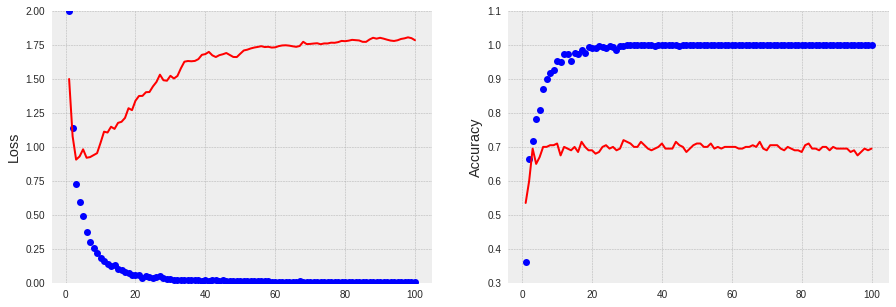

In [349]:
# PLOTS NETWORK
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(1,2,1)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='red')
plt.ylabel('Loss')
plt.title('')
plt.ylim(0,2)

plt.subplot(1,2,2)
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.ylim(0.3,1.1)
plt.ylabel('Accuracy')
plt.title('')
plt.title('')

plt.show()

**COMMENT:** Completely overfit

---

**NOTE** The section has represented an attempt to work with Multi graph models. Due to the bad perspectives shown in the plot, the models have not been retrained with the attempt of  working on the hyperparameters to reduce overfitting or increase the performance. 

**No further attempts have been made in this section**.

---

# Part IV: MODEL SELECTION 

The last part of the project intend to define the model to chose after the process of analysis done in the previous section.

Despite none of the model seemed to have granted higher results in terms of accuracy, the model defined using the Convolutional Neural Network has obtained the best results in terms of accuracy and loss after a series of works on its hyperparameters.
As a consequence, this mode will be chosen versus the model built in the other sections, and it will be used to visualise the results of the analysis. 

In [368]:
# COMPARE ACCURACY ON TEST DATA FOR BOTH THE 'FINAL' MODELS:
print('Accuracy of the Fully-Connected Neural Network = ', fully_connected ,'%')
print('Accuracy of the Convolutional Neural Network = ', cnn ,'%')

Accuracy of the Fully-Connected Neural Network =  72.0 %
Accuracy of the Convolutional Neural Network =  75.33 %


## Visualise the Predictions, using the Model chosen CNN

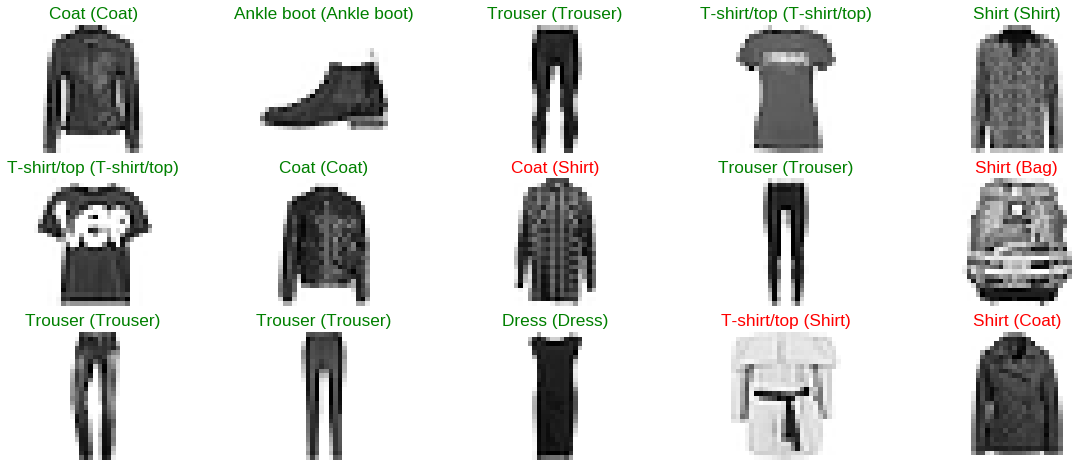

In [370]:
y_hat = cnn_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**COMMENT:** The graphical representation of the model represents the ability  to recognize the label of images by the program. In this sense, the accuracy around 75% of the model is shown by the 4 mistakes made for the 15 images presented. By observing graphically the image and the label which has been confused by the program we can observe that the shirt seems to represent the most challenging label to recognise. 

# CONCLUSION


The project proposed has attempted to show a series of tools and models available when working with Deep Learning networks. For the occasion, I decided to work on the 'iconic' Fashion MNIST dataset, which is widely used by the community when it comes to learn the concepts related to Deep Learning.
However, at first I decided to penalise (to use a similitude with the Machine Learning language) my goal by using only a number of observation lower than 1000. In this context, I attempted to apply different models, ranging from the Sequencial neural networks, with the Fully-connected models to the Convolutional neural networks, to the more adavanced methods related to the Functional API, exploring a series of Multi-graph like models such as Inception and Residual Connection model.

Despite the efforts and the sure experience gained during this project, I cannot consider myself wholly satisfied about the results in terms of development and strategies of actions on the hyperparameters. In this sense, it is also opportune to admit how deep learning methods seem to suffer more than other methods the absence of numerous inputs when trained. On the other side, the process of refining of deep learning methods is a long process, and come with experience. This project intended to expose my knowledge about the different possibilities and concepts of Deep Learning, which surely represent the basis and necessary condition to be able to make experience in the future.

---